<a href="https://colab.research.google.com/github/makarandmadhavi/TMINST-Character-Classification/blob/main/Neural_Network_Type_Classification_%7C_TMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Type Classification | TMNIST

## Assignment

Find a  "Hello World"  Handwritten Digit Classification (MNIST) tutorial and create a similar tutorial for one of the TMNIST data sets.

The tutorial must be posted on Kaggle associated with the data set you use (see https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/codeLinks to an external site. )   Your notebook MUST not be identical to the other notebooks associated with the data.



Grading Rubric

40 % (accuracy)

Minus 1 point for every 1% accuracy below 95% for TMNIST (Typeface MNIST)

Minus 1 point for every 1% accuracy below 90% for TMNIST Alphabet (94 characters) or TMNIST-Glyphs (MNIST Style Glyph images)

 

10 % (Uniqueness)

Up to 10 points may be deducted if your notebook looks too similar to the other notebooks posted (i.e. You will get 10 points if it looks like you wrote it and didn't copy it)

 

50 % (Explanation)

How well did you explain the math, code, and ideas behind your neural network?

# Image Classification using CNN
### Deep Learning
Deep learning is a type of machine learning that uses artificial neural networks with multiple layers to learn and solve complex problems. It is inspired by the structure and function of the human brain, where neurons process information and communicate with each other.

In deep learning, neural networks are designed to automatically learn and extract features from large amounts of data without requiring explicit programming. The more layers a neural network has, the more complex features it can learn, making it capable of solving complex tasks such as image recognition, natural language processing, and speech recognition.

Deep learning has revolutionized many fields, including computer vision, natural language processing, speech recognition, and robotics. It has also been used in various applications, such as self-driving cars, recommender systems, and fraud detection.

### Convolutional Neural Network

A Convolutional Neural Network (CNN) is a type of deep learning neural network that is commonly used for image and video recognition, processing and analysis.

CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply a set of filters to the input image to extract features such as edges, lines, and shapes. The pooling layers downsample the output of the convolutional layers to reduce the size of the features and prevent overfitting. The fully connected layers use the extracted features to make predictions about the input image.

The architecture of a CNN is inspired by the organization of neurons in the visual cortex of animals. It is designed to mimic the process of how the human visual system works, which makes it highly effective for image classification and recognition tasks.

CNNs have been used in a wide range of applications, including image recognition, object detection, face recognition, medical image analysis, and self-driving cars.


In [48]:
from tensorflow import keras
import numpy as np 
import pandas as pd 

from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam
from keras.utils import np_utils
import keras
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import warnings; 
warnings.simplefilter('ignore')

# About the DataSet
Our goal is to construct and train an artificial neural network on thousands of TMNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

This dataset contains 274093 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

Using Tensorflow and keras in the Backend to construct and train the model

In [49]:
#reading the dataset
df=pd.read_csv('94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
count_row = df.shape[0]  # Gives number of rows
print('Number of images = ',count_row)

Number of images =  274093


In [50]:
print(df['labels'].unique())
no_of_classes=df['labels'].nunique()
print('Number of classes are',no_of_classes)

['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Number of classes are 94


In [51]:
no_of_fonts=df['names'].nunique()
print('Number of different fonts are',no_of_fonts)

Number of different fonts are 2990


# Data Visualization and Pre-processing

Visualizing 784 csv columns to 28x28 resolution images

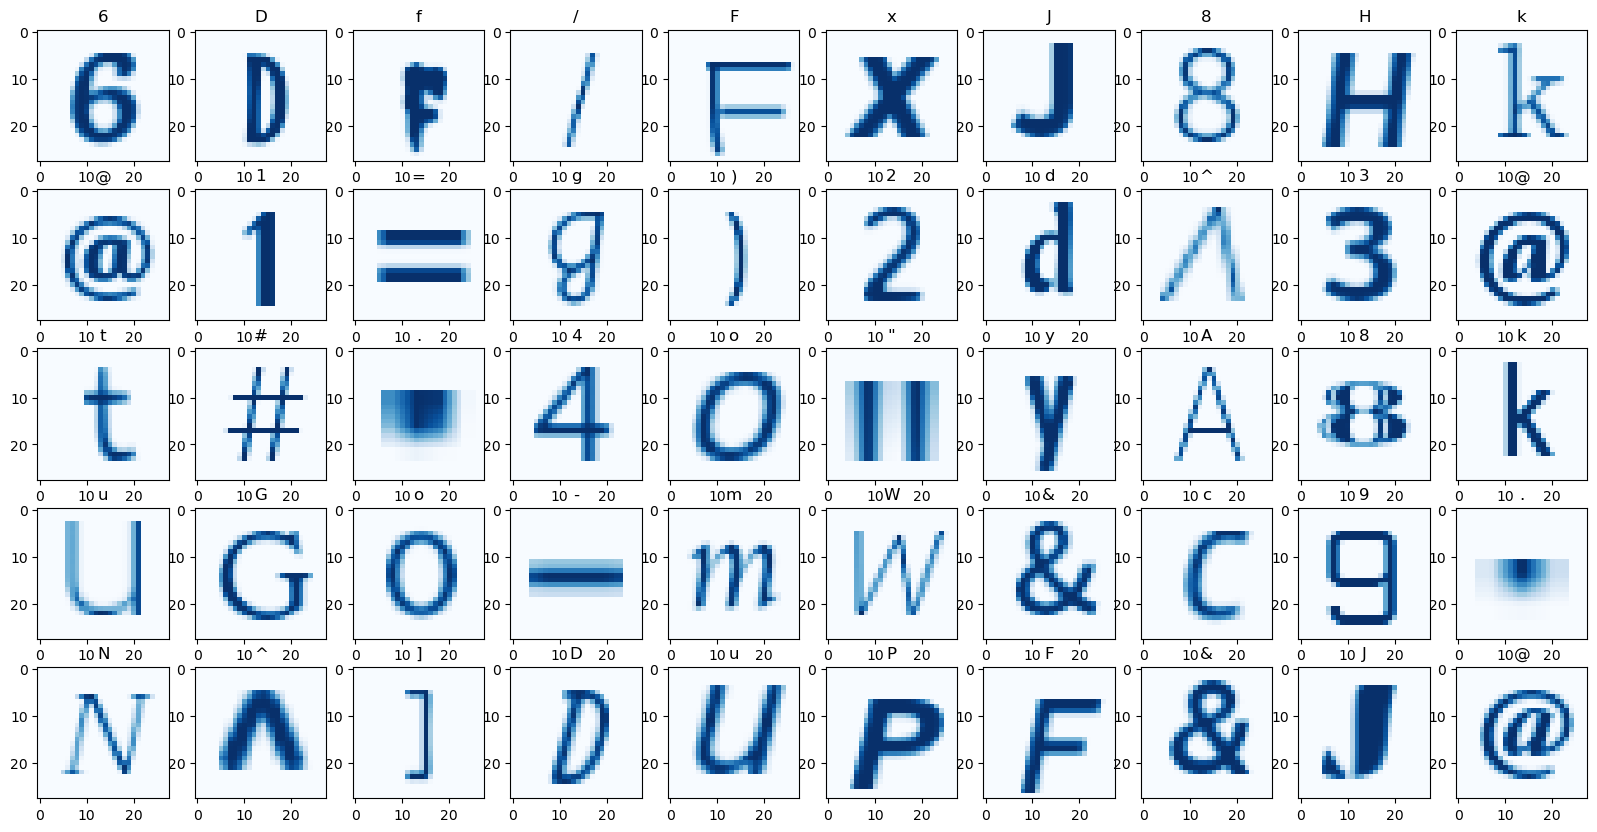

In [52]:
#defining the class column and removing other unneccesary columns
y=df['labels']
X=df.drop(['names','labels'],axis=1)
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(20, 10))
for i in range(50):  
    plt.subplot(5,10,i+1)
    plt.title(y.iloc[i])
    plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('Blues'))
plt.show()

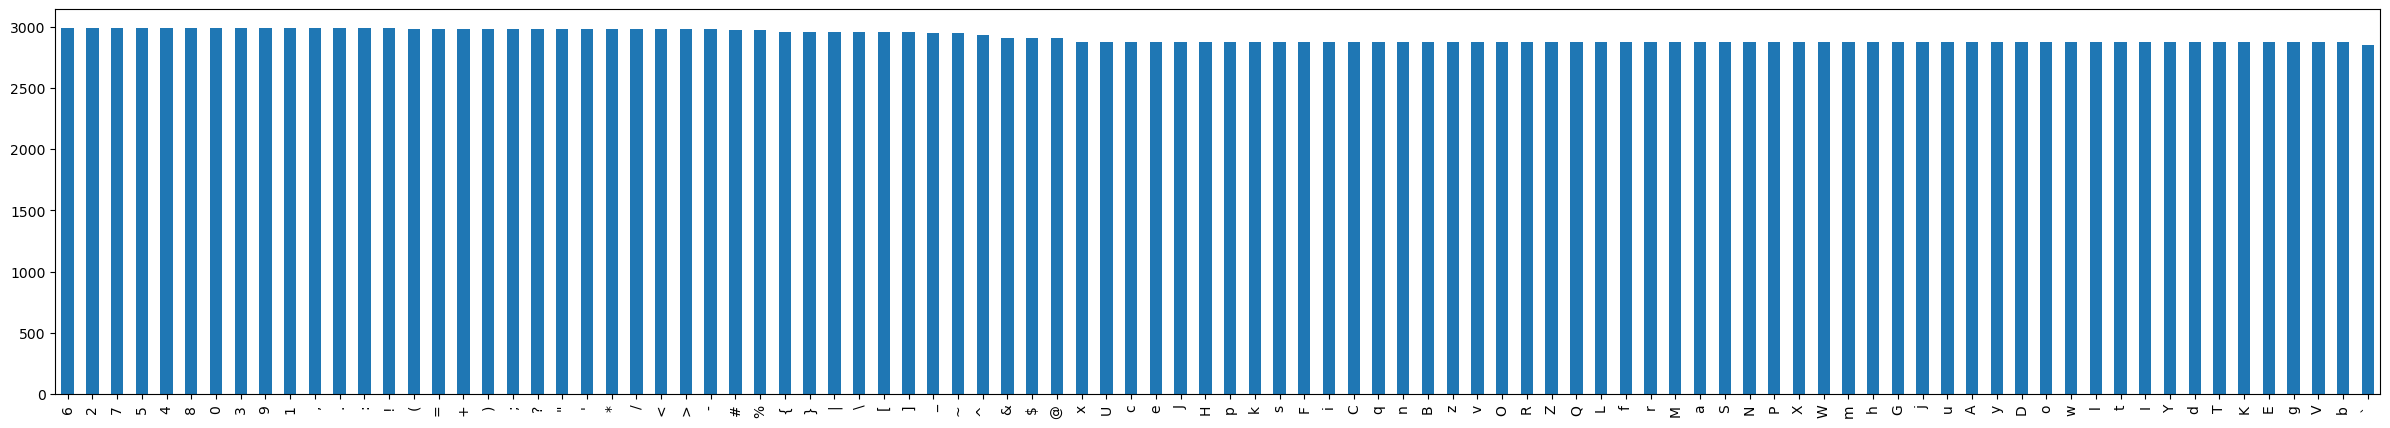

In [60]:
plt.xticks(rotation=90)
df['labels'].value_counts().plot(kind='bar',figsize=(30,5))


Categorical plot shows data is almost evenly distributed across all labels. There is no quantitative bias with any character

### Train-Test Split

We create a 70% training and 30% Testing data split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42,stratify=y)

In [54]:
y.head()

0    6
1    D
2    f
3    /
4    F
Name: labels, dtype: object

As predictor variables are ascii characters we encode them using oneHotEncoder 

In [ ]:
# Encoding the Target Label
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1,1))
y_test =  enc.transform(y_test.values.reshape(-1,1))

### Reshaping of images
The shape of X_train is (205569 , 28, 28, 1). As all the images are in grayscale, the number of channels is 1. If it was a color image, then the number of channels would be 3 (R, G, B).

Here we’ve rescaled the image data so that each pixel lies in the interval [0, 1] instead of [0, 255]. It is always a good idea to normalize the input so that each dimension has approximately the same scale.

In [ ]:
X_train=X_train.values.reshape(X_train.shape[0],28,28,1)
X_test=X_test.values.reshape(X_test.shape[0],28,28,1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (191865, 28, 28, 1)
191865 train samples
82228 test samples


# Layers in CNN
A Convolutional Neural Network (CNN) is composed of different layers, each serving a specific purpose.

* The first layer is the Convolutional Layer, which applies filters on the image to generate feature maps. The ReLU correction layer replaces all negative values received as inputs by zeros.

* The Pooling Layer is used to down-sample the input to enable the model to make assumptions about the features, which reduces over-fitting and training time. The Pooling Layer is usually a bridge between the Convolutional Layer and the Fully Connected (FC) Layer. There are three types of pooling: Max, Average, and Sum.

* After creating all the convolutional layers, we need to flatten them and feed them to the FC Layers, which classify the features learned by the CNN. Dropout is used to overcome overfitting by randomly dropping some neurons from the neural network during training.

* Finally, Activation Layer determines whether a neuron should be activated or not using activation functions like ReLU, Softmax, tanH and Sigmoid. The choice of activation function depends on the specific usage.

# CNN Model Architecure
The model will consist of **2 Concolutional Layers** and **2 Fully Connected Layers**
* Activation Function in Convolutional Layers: **ReLU**

    ReLU stands for Rectified Linear Unit and is an activation function used in neural networks. It calculates the "weighted sum" of the input, adds a bias, and then decides whether it should be "fired" or not. The function returns the input value if it's positive and zero if it's negative. In mathematical notation, ReLU is represented as A(x) = max(0, x), where x is the input value, and A(x) is the output of the function. ReLU is nonlinear in nature and is used in deep learning models to introduce nonlinearity and improve the model's accuracy.
* Activation function in Output Layer: **Softmax** 

    Softmax is an activation function used in neural networks that is typically used in the output layer of a model for multiclass classification tasks. The function takes an input vector of real numbers and outputs a probability distribution over the classes. It squashes the outputs of each unit to be between 0 and 1 and then normalizes them to sum up to 1, so the output can be interpreted as a probability distribution.
* Loss function: **Categorical Cross-entropy**
    
    In CNN, an optimizer is an algorithm that adjusts the weights and biases of a neural network during training in order to minimize the loss function and improve the accuracy of the model. 
    
    Categorical Cross-entropy is a loss function used in machine learning for classification tasks that measures the dissimilarity between the predicted probability distribution and the true probability distribution of the target classes.
* Optimizer: **Adam**
    
    The optimizer automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error.
   
   In CNN, Adam optimizer is a popular stochastic gradient descent optimization algorithm that computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients and is well-suited for large datasets or parameters.

In [ ]:
batch_size = 1024
img_rows, img_cols = 28, 28         # input image dimensions
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)                  # size of pooling area for max pooling
prob_drop_conv = 0.25               # drop probability for dropout @ conv layer
prob_drop_hidden = 0.25             # drop probability for dropout @ fc layer

In [ ]:
# Convolutional model
model = Sequential()

# conv1 layer
model.add(Convolution2D(64, (5,5), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2,2), padding='same'))
model.add(Dropout(prob_drop_conv))

model.add(Flatten())

# fc1 layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 7, 7, 32)         

In [ ]:
# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=batch_size, shuffle=True, verbose=1)

Epoch 1/30


2023-04-16 16:29:28.820817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 1.3917 - accuracy: 0.6405

2023-04-16 16:29:43.779337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 17s 88ms/step - loss: 1.3917 - accuracy: 0.6405 - val_loss: 0.5182 - val_accuracy: 0.8518
Epoch 2/30
188/188 [==============================] - 16s 85ms/step - loss: 0.5513 - accuracy: 0.8352 - val_loss: 0.3914 - val_accuracy: 0.8788
Epoch 3/30
188/188 [==============================] - 16s 85ms/step - loss: 0.4409 - accuracy: 0.8622 - val_loss: 0.3378 - val_accuracy: 0.8940
Epoch 4/30
188/188 [==============================] - 16s 85ms/step - loss: 0.3790 - accuracy: 0.8806 - val_loss: 0.3023 - val_accuracy: 0.9037
Epoch 5/30
188/188 [==============================] - 16s 85ms/step - loss: 0.3386 - accuracy: 0.8927 - val_loss: 0.2701 - val_accuracy: 0.9155
Epoch 6/30
188/188 [==============================] - 16s 87ms/step - loss: 0.3095 - accuracy: 0.9022 - val_loss: 0.2536 - val_accuracy: 0.9192
Epoch 7/30
188/188 [==============================] - 17s 92ms/step - loss: 0.2882 - accuracy: 0.9083 - val_loss: 0.2530 - val_accuracy: 0.9177
Epo

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

81/81 [==============================] - 2s 25ms/step - loss: 0.1834 - accuracy: 0.9404
Summary: Loss over the test dataset: 0.18, Accuracy: 0.9404


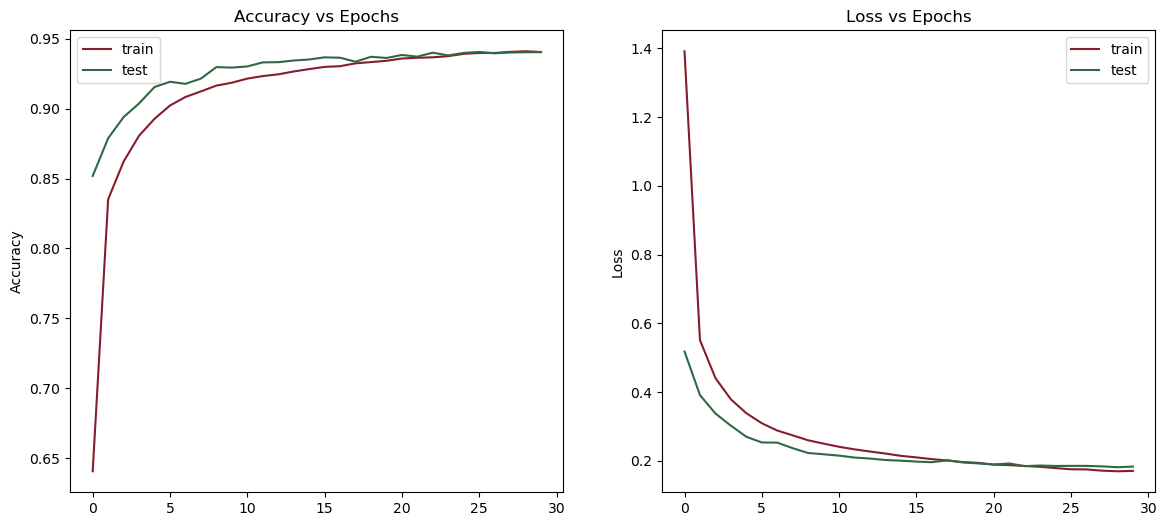

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(30)

plt.title('Accuracy vs Epochs')
plt.plot(epochs,history.history['accuracy'],label='train', color='#851D2D')
plt.ylabel('Accuracy')
plt.plot(epochs,history.history['val_accuracy'],label='test', color='#306844')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,history.history['loss'],label='train', color='#851D2D')
plt.ylabel('Loss')
plt.plot(epochs,history.history['val_loss'],label='test', color='#306844')
plt.legend()
plt.show()

# Conclusion

We explored the 94 Alphabet TMNIST dataset. Compiled a Convolutional Neural Network model using adam optimizer and finally trained the model to get a validation accuracy of 94.04 

# License
### References


60% code is written by me with other 40% referenced and modified from various sources such as stackoverflow geeksforgeeks and ChatGPT

* Keras - https://keras.io/
* Dataset - https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter
* ChatGPT - https://chat.openai.com/chat

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 Makarand Madhavi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.